In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd

In [ ]:
# API_URL = "http://127.0.0.1:8000/api/data/"

In [ ]:
# response = requests.get(API_URL) # Fetch data from Django API
# if response.status_code == 200:
#     data = response.json()
#     df = pd.DataFrame(data)
#     print("Data Loaded Successfully!")
# else:
#     print("Error fetching data:", response.status_code)

In [ ]:
def get_data(API_URL):
    try:
        response = requests.get(API_URL) # Fetch data from Django API
    except requests.exceptions.RequestException as e:
        print("Error fetching data:", e)
        return None
    else:
        if response.status_code == 200:
            data = response.json()
            df = pd.DataFrame(data)
            print("Data Loaded Successfully!")
            return df
        else:
            print("Error fetching data:", response.status_code)
            return None

In [2]:
# try:
#     df = get_data(API_URL)
#     if df is not None:
#         print(df.head())
# except Exception as e:
#     print("Error:", e)

df = pd.read_csv("synthetic_student_data.csv")

In [3]:
def dataframeInfo(df):
    print("\nDataframe Head:")
    print(df.head()) # Display the first 5 rows
    
    print("\nDataframe Random data:")
    print(df.sample(5)) # Display 5 random rows
    
    print("\nDataframe Tail:")
    print(df.tail()) # Display the last 5 rows
    
    print("\nDataframe Columns:")
    print(df.columns) # Display the column names
    
    print("\nDataframe Shape:")
    print(df.shape) # Display the number of rows and columns
    
    print("Dataframe Info:")
    print(df.info()) # Display the data types and missing values
    
    print("\nDataframe Description:")
    print(df.describe()) # Display the summary statistics
    return

In [4]:
df.head() # Display the first 5 rows

,student_id,year_of_study,major,study_hours_per_day,study_schedule,study_environment,focus_level,gpa,avg_sleep_hours,sleep_quality,...,extracurricular_hours,extracurricular_impact,extracurricular_impact_stress_levels,career_preparedness,internship_experience,job_confidence,part_time_job,work_hours_per_week,financial_stress,financial_stress_impact
0,1,4,SOLS,3-4,Weekends only,"Quiet (Library, study room, etc.)",7,8.33,Less than 4 hours,Good,...,More than 6 hours,Negatively,Increases stress,Somewhat prepared,Yes,7,Yes,10-15 hours,No,Negatively
1,2,5,SOL,3-4,Weekends only,I don’t have a dedicated study space,5,0.11,4-5 hours,Poor,...,More than 6 hours,Positively,Increases stress,Somewhat prepared,Yes,7,No,5-10 hours,No,No Impact
2,3,3,SOCS,1-2,Daily study routine,I don’t have a dedicated study space,9,7.50,8 or more hours,Poor,...,More than 6 hours,Negatively,Increases stress,"Yes, fully prepared",Yes,5,Yes,Not Applicable,Yes,No Impact
3,4,5,SOLS,3-4,Weekends only,"Quiet (Library, study room, etc.)",4,7.59,Less than 4 hours,Fair,...,4-6 hours,No Effect,Reduces stress,Somewhat prepared,Yes,1,Yes,Not Applicable,Yes,Positively
4,5,5,SOD,More than 6 hours,"Sporadic, depending on assignments/tests","Noisy (Café, dorm, etc.)",3,6.78,8 or more hours,Poor,...,Less than 1 hour,Positively,Increases stress,Not prepared at all,No,9,No,Not Applicable,No,No Impact


In [5]:
df.columns # Display the column names

Index(['student_id', 'year_of_study', 'major', 'study_hours_per_day',
       'study_schedule', 'study_environment', 'focus_level', 'gpa',
       'avg_sleep_hours', 'sleep_quality', 'productivity_level',
       'sleep_disruption', 'stress_level', 'stress_factors',
       'frequency_of_overwhelm', 'relaxation_techniques', 'social_media_hours',
       'social_media_impact', 'social_media_platforms',
       'extracurricular_participation', 'extracurricular_hours',
       'extracurricular_impact', 'extracurricular_impact_stress_levels',
       'career_preparedness', 'internship_experience', 'job_confidence',
       'part_time_job', 'work_hours_per_week', 'financial_stress',
       'financial_stress_impact'],
      dtype='object')

In [6]:
df.shape # Display the number of rows and columns

(500, 30)

In [7]:
df.info() # Display the data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   student_id                            500 non-null    int64  
 1   year_of_study                         500 non-null    int64  
 2   major                                 500 non-null    object 
 3   study_hours_per_day                   500 non-null    object 
 4   study_schedule                        500 non-null    object 
 5   study_environment                     500 non-null    object 
 6   focus_level                           500 non-null    int64  
 7   gpa                                   500 non-null    float64
 8   avg_sleep_hours                       500 non-null    object 
 9   sleep_quality                         500 non-null    object 
 10  productivity_level                    500 non-null    int64  
 11  sleep_disruption   

In [8]:
df.describe() # Display the summary statistics

,student_id,year_of_study,focus_level,gpa,productivity_level,stress_level,job_confidence
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2.970000,5.488000,4.927580,5.406000,5.588000,5.528000
std,144.481833,1.425891,2.824502,2.932527,2.938441,2.860528,2.900697
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,125.750000,2.000000,3.000000,2.270000,3.000000,3.000000,3.000000
50%,250.500000,3.000000,5.000000,4.875000,6.000000,6.000000,6.000000
75%,375.250000,4.000000,8.000000,7.500000,8.000000,8.000000,8.000000
max,500.000000,5.000000,10.000000,9.970000,10.000000,10.000000,10.000000


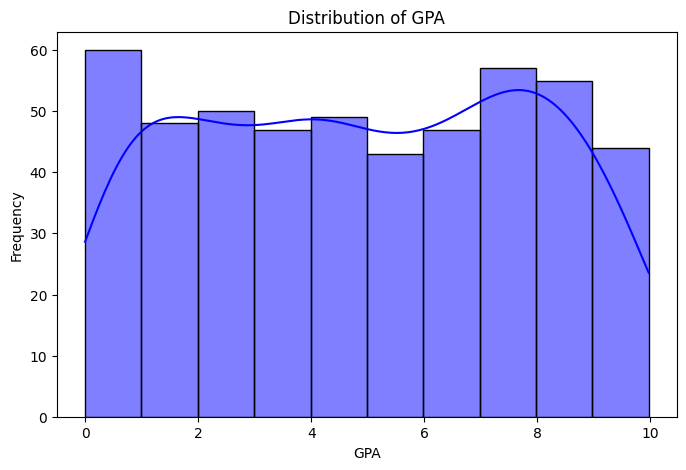

In [9]:
# Histogram for GPA distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['gpa'], bins=10, kde=True, color='blue')
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.show()


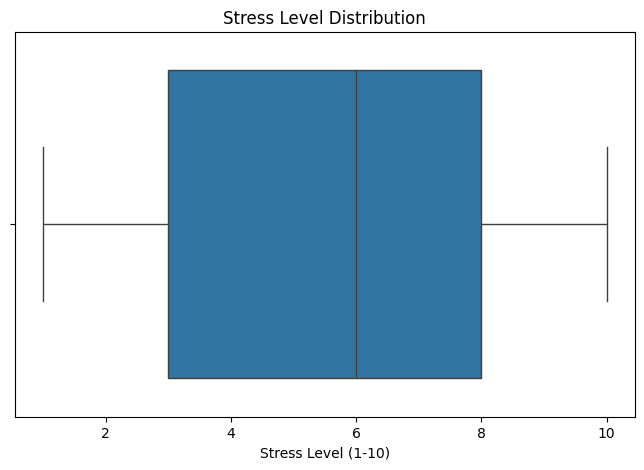

In [10]:
# Boxplot for Stress Levels
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['stress_level'])
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level (1-10)")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_935080\17958160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['study_hours_per_day'], order=df['study_hours_per_day'].value_counts().index, palette="coolwarm")


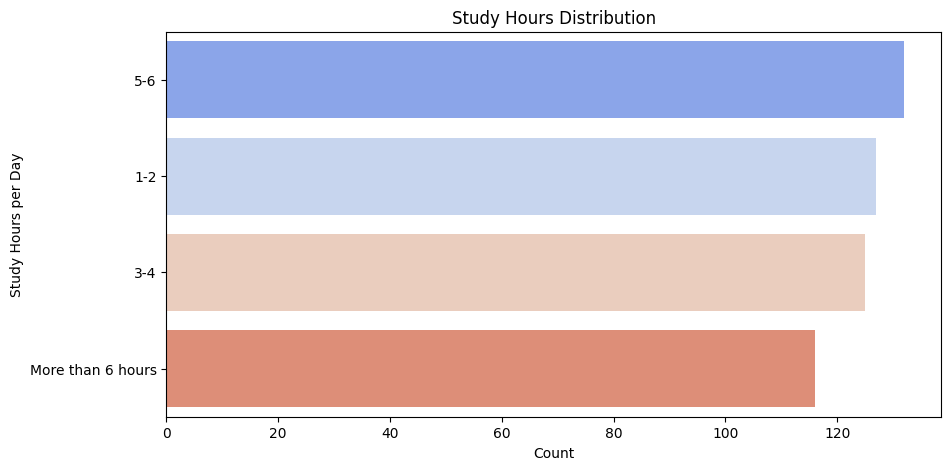

In [11]:
# Countplot for Study Habits
plt.figure(figsize=(10, 5))
sns.countplot(y=df['study_hours_per_day'], order=df['study_hours_per_day'].value_counts().index, palette="coolwarm")
plt.title("Study Hours Distribution")
plt.xlabel("Count")
plt.ylabel("Study Hours per Day")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_935080\3651987626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['sleep_quality'], order=df['sleep_quality'].value_counts().index, palette="viridis")


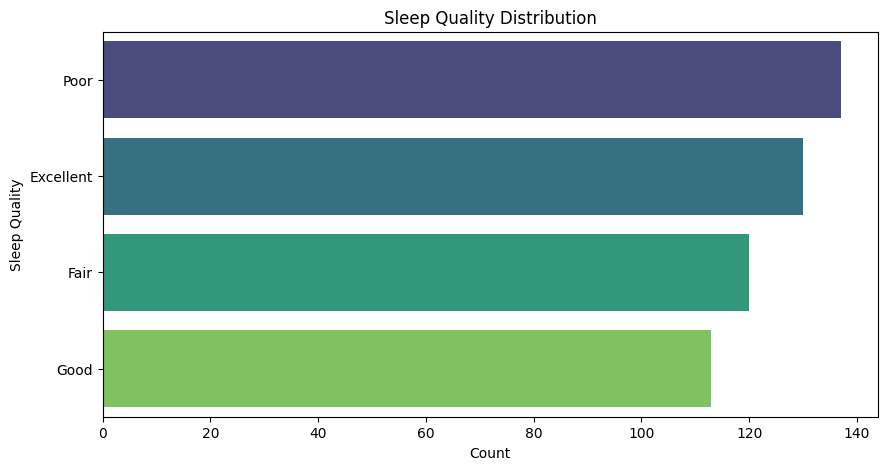

In [12]:
# Countplot for Sleep Quality
plt.figure(figsize=(10, 5))
sns.countplot(y=df['sleep_quality'], order=df['sleep_quality'].value_counts().index, palette="viridis")
plt.title("Sleep Quality Distribution")
plt.xlabel("Count")
plt.ylabel("Sleep Quality")
plt.show()


In [15]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Correlation Heatmap")
# plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_935080\194274603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["study_hours_per_day"], y=df["gpa"], palette="magma")


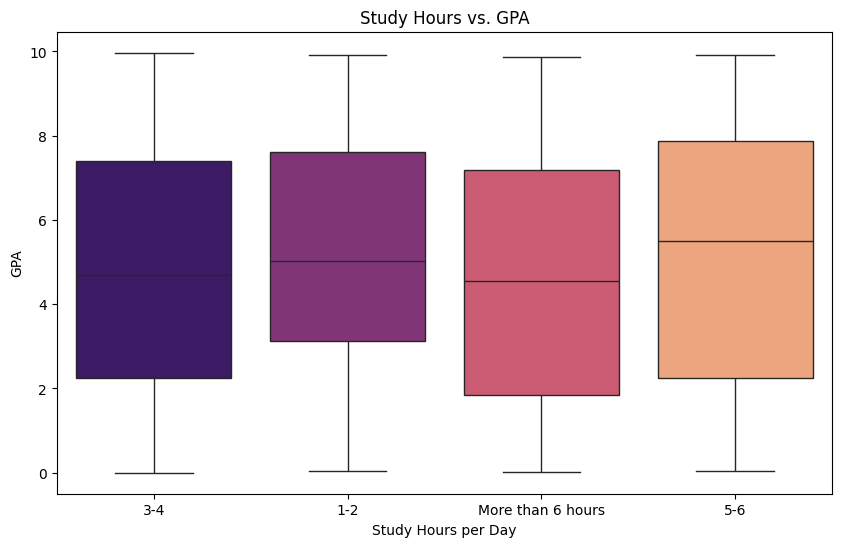

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["study_hours_per_day"], y=df["gpa"], palette="magma")
plt.title("Study Hours vs. GPA")
plt.xlabel("Study Hours per Day")
plt.ylabel("GPA")
plt.show()


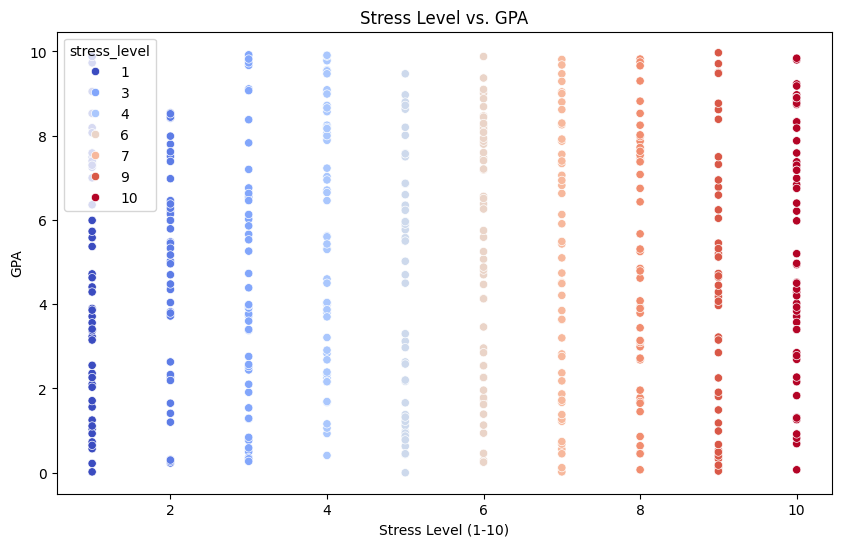

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['stress_level'], y=df['gpa'], hue=df['stress_level'], palette="coolwarm")
plt.title("Stress Level vs. GPA")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("GPA")
plt.show()


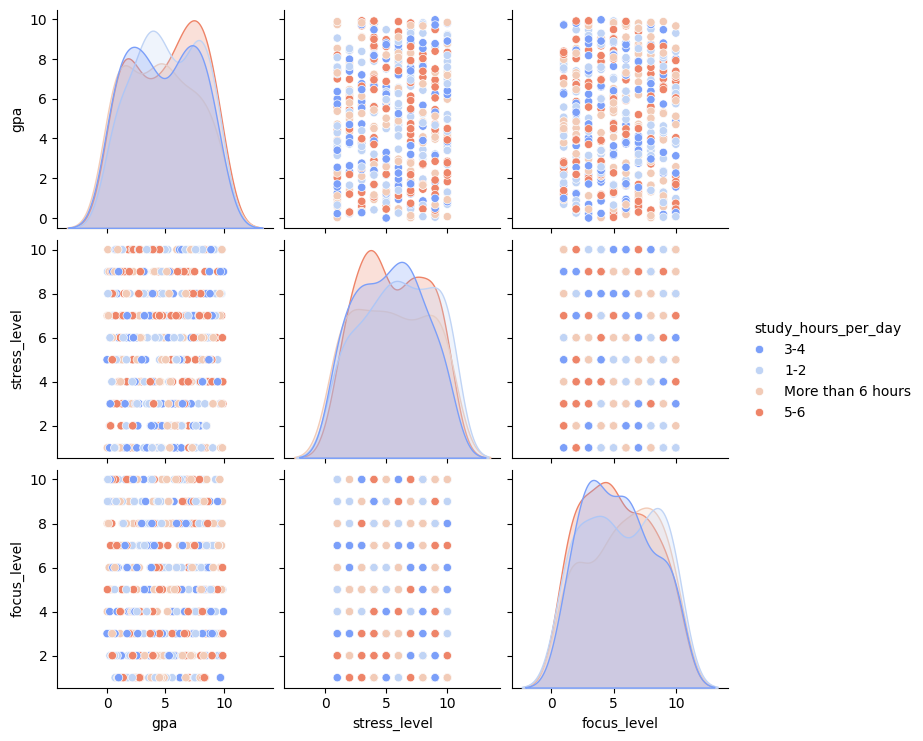

In [18]:
sns.pairplot(df[['gpa', 'study_hours_per_day', 'stress_level', 'sleep_quality', 'focus_level']], hue="study_hours_per_day", palette="coolwarm")
plt.show()


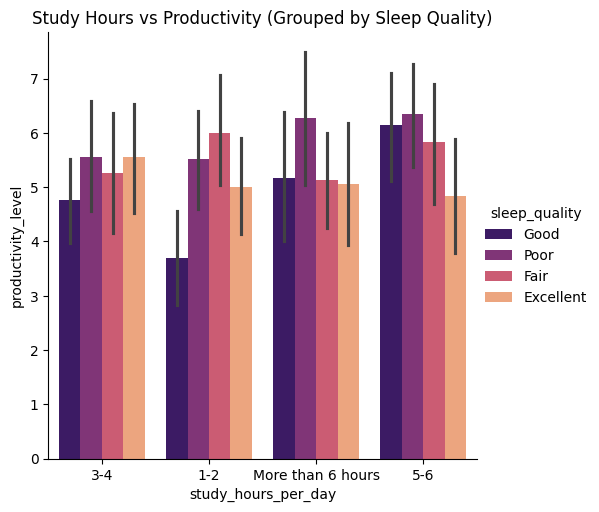

In [19]:
sns.catplot(x="study_hours_per_day", y="productivity_level", hue="sleep_quality", kind="bar", data=df, palette="magma")
plt.title("Study Hours vs Productivity (Grouped by Sleep Quality)")
plt.show()
